<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Packages-Import" data-toc-modified-id="Packages-Import-1">Packages Import</a></span></li><li><span><a href="#ciCOH-threshold-with-Normal-Distribution" data-toc-modified-id="ciCOH-threshold-with-Normal-Distribution-2">ciCOH threshold with Normal Distribution</a></span></li></ul></div>

## Packages Import

In [2]:
import os, sys
import numpy as np
from numpy.random import normal
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
# extract the exp folder path
currfolder = os.getcwd()
codefolder = currfolder[0 : currfolder.find('code')+len('code')]

# add path the exp folder
sys.path.append(codefolder)

# import_nbmodule used for import package in .ipynb
import import_nbmodule

# import ciCoherence_overtime in connAnalyTool/synchronization_indices.ipynb
from connAnalyTool.synchronization_indices import ciCoherence_acrosstrials

importing Jupyter notebook from /Users/linglingyang/yang7003@umn.edu/NMRC_umn/Projects/FCAnalysis/exp/code/connAnalyTool/synchronization_indices.ipynb


##  ciCOH threshold with Normal Distribution

In [4]:
def threshold_ciCOH_normal(ntimes, ntrials, ntemp, alpha = 0.05, ploton = True):
    """
        using normal distribution to simulated the no connections and identify the threshold for has connection
        
        @paras:
            ntimes: the repeated time (can be set nchns * nchns)
            ntrials: the number of trials 
            ntemp: the length of the temporal data
            alpha: the critirial (5%, or 1%)
            ploton: show a figure if True
        
        @return:
            threshold
    """

    ## generate time series with Normal Distribution (no connection)
    mu, sigma = 0, 1
    sigs1, sigs2 = normal(mu, sigma, (ntimes, ntrials, ntemp)), normal(mu, sigma, (ntimes, ntrials, ntemp)) 


    ## calculate the ciCOH of the simulated time series
    ciCOHs = []
    for timei in range(ntimes):

        sig1, sig2 = sigs1[timei, :, :], sigs2[timei, :, :]

        # calculate ciCOH
        ciCOH = np.mean(ciCoherence_acrosstrials(sig1, sig2))
        ciCOHs.append(ciCOH)

        del ciCOH, sig1, sig2 


    ## return the threshold
    # Fit a normal distribution to the data:
    mu, std = norm.fit(ciCOHs)

    if alpha == 0.05:
        threshold = np.around(mu + 2*std, decimals=4)
    if alpha == 0.01:
        threshold = np.around(mu + 3*std, decimals=4)

        
    ## plot the ciCOH distribution of the simulated data 
    if ploton:
        plt.rc('text', usetex=True)

        # Plot the histogram.
        plt.hist(ciCOHs, bins=25, density=True, alpha=0.6, color='g')

        # Plot the PDF.
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        plt.plot(x, p, 'k', linewidth=2)


        # plot the 2*std lines
        plt.plot([mu + 2 * std, mu + 2 * std], np.array(plt.ylim())/2, 'b--', 
                 [mu - 2 * std, mu - 2 * std], np.array(plt.ylim())/2, 'b--')

        # plot the 3*std lines
        plt.plot([mu + 3 * std, mu + 3 * std], np.array(plt.ylim())/2, 'k--', 
                 [mu - 3 * std, mu - 3 * std], np.array(plt.ylim())/2, 'k--')


        eq1 = r"\begin{eqnarray*}" + \
              r"\mu = " + str(np.around(mu, decimals=2)) + "\\"\
              r"\std = " + str(np.around(std, decimals=4)) + "\\"\
              r"\95 \%= " + str(np.around(mu + 2*std, decimals=4)) + "\\"\
              r"\99 \%= " + str(np.around(mu + 3*std, decimals=4)) +\
              r"\end{eqnarray*}"

        ymin, ymax = plt.ylim()
        plt.text(0.008, (ymin + ymax*3)/4, eq1, {'fontsize': 12}, va="top", ha="left")

        title = "Probability distribution fit of ciCOH data"
        plt.title(title, size=15)

        plt.show()
    
    return threshold

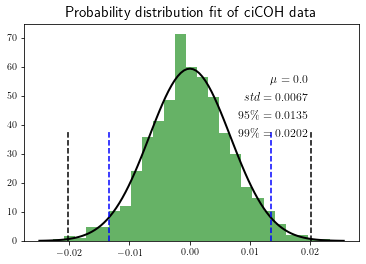

In [20]:
if __name__ == '__main__':
    threshold = threshold_ciCOH_normal(ntimes=1000, ntrials = 93, ntemp = 250, ploton = True )

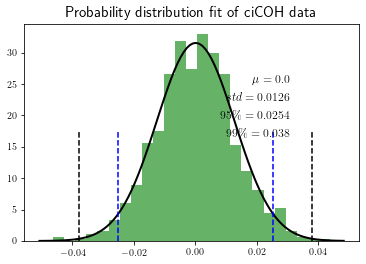

In [6]:
threshold = threshold_ciCOH_normal(ntimes=1000, ntrials = 26, ntemp = 250, ploton = True )